In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("C:/Users/Siddhant Pandey/Downloads/restaurant-revenue-prediction/train.csv.zip")
train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [3]:
test = pd.read_csv("C:/Users/Siddhant Pandey/Downloads/restaurant-revenue-prediction/test.csv.zip", index_col='Id')
test.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
Id,,,,,,,,,,,,,,,,,,,,,
0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,...,2.0,3.0,0,0,0,0,0,0,0,0
1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,...,2.0,3.0,0,4,0,0,0,0,0,0
4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,...,5.0,3.0,0,0,0,0,0,0,0,0


In [4]:
from datetime import date, datetime

def calculate_age(born):
        born = datetime.strptime(born, "%m/%d/%Y").date()
        today = date.today()
        return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

train['Age'] = train['Open Date'].apply(calculate_age)
test['Age'] = test['Open Date'].apply(calculate_age)

# Drop 'Open Date' column from Dataframes
train = train.drop('Open Date', axis=1)
test = test.drop('Open Date', axis=1)

# Drop 'Id' column from Dataframes
train = train.drop('Id', axis=1)

train.head()

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Age
0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,...,5,3,4,5,5,4,3,4,5653753.0,22
1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,0,0,6923131.0,13
2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,...,0,0,0,0,0,0,0,0,2055379.0,8
3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,...,25,12,10,6,18,12,12,6,2675511.0,9
4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,...,5,1,3,2,3,4,3,3,4316715.0,12


In [5]:
# Find the sets of categorical variables and numberical variales for feature analyses 
numerical_features = train.select_dtypes([np.number]).columns.tolist()
categorical_features = train.select_dtypes(exclude = [np.number,np.datetime64]).columns.tolist()
print(categorical_features)
print(numerical_features)

['City', 'City Group', 'Type']
['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue', 'Age']


count    1.370000e+02
mean     4.453533e+06
std      2.576072e+06
min      1.149870e+06
25%      2.999068e+06
50%      3.939804e+06
75%      5.166635e+06
max      1.969694e+07
Name: revenue, dtype: float64


[Text(0.5, 0, 'revenue'), Text(0, 0.5, 'P(revenue)')]

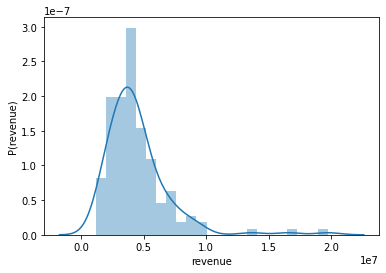

In [7]:
print(train['revenue'].describe())
sns.distplot(a=train['revenue'], kde=True).set(xlabel='revenue', ylabel='P(revenue)')

In [8]:
train[train['revenue'] > 10000000 ]

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Age
16,İstanbul,Big Cities,FC,3,5.0,4.0,4.0,2,5,5,...,0,0,0,0,0,0,0,0,19696939.0,21
75,İstanbul,Big Cities,FC,5,5.0,4.0,5.0,1,4,5,...,0,0,0,0,0,0,0,0,16549064.0,15
99,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,4,5,...,5,5,4,2,5,5,5,3,13575224.0,21


In [9]:
# Drop outliers
train = train[train['revenue'] < 10000000 ]
train.reset_index(drop=True).head()

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Age
0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,...,5,3,4,5,5,4,3,4,5653753.0,22
1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,0,0,6923131.0,13
2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,...,0,0,0,0,0,0,0,0,2055379.0,8
3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,...,25,12,10,6,18,12,12,6,2675511.0,9
4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,...,5,1,3,2,3,4,3,3,4316715.0,12


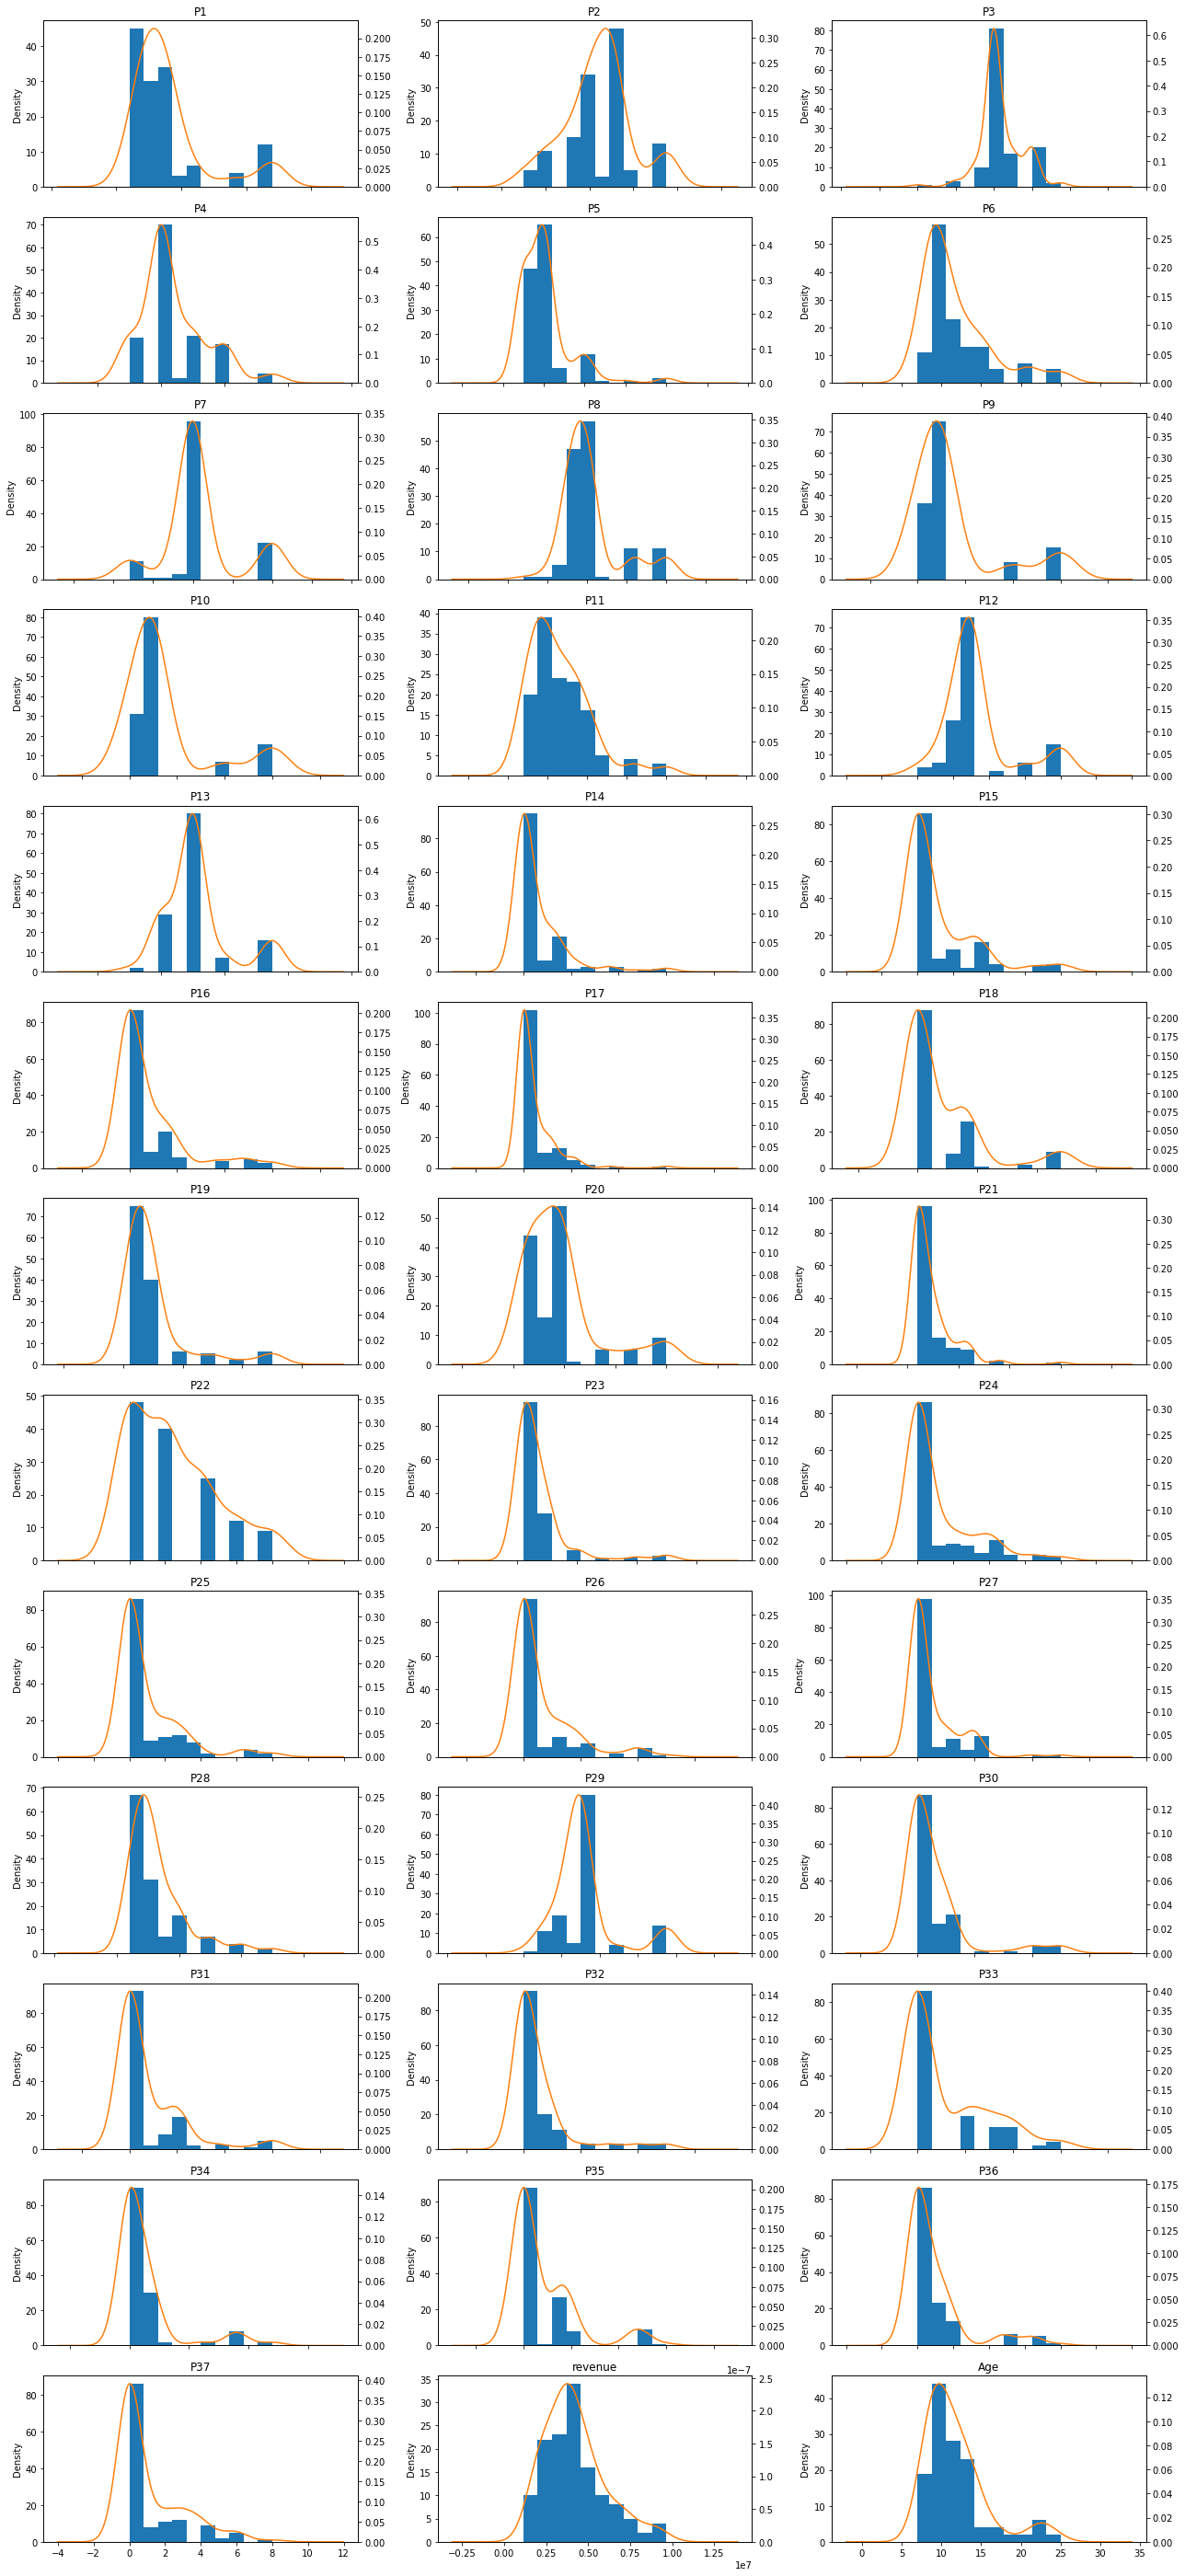

In [11]:
n = len(train[numerical_features].columns)
w = 3
h = (n - 1) // w + 1
fig, axes = plt.subplots(h, w, figsize=(w * 6, h * 3))
for i, (name, col) in enumerate(train[numerical_features].items()):
    r, c = i // w, i % w
    ax = axes[r, c]
    col.hist(ax=ax)
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name)
    ax2.set_ylim(0)

fig.tight_layout()

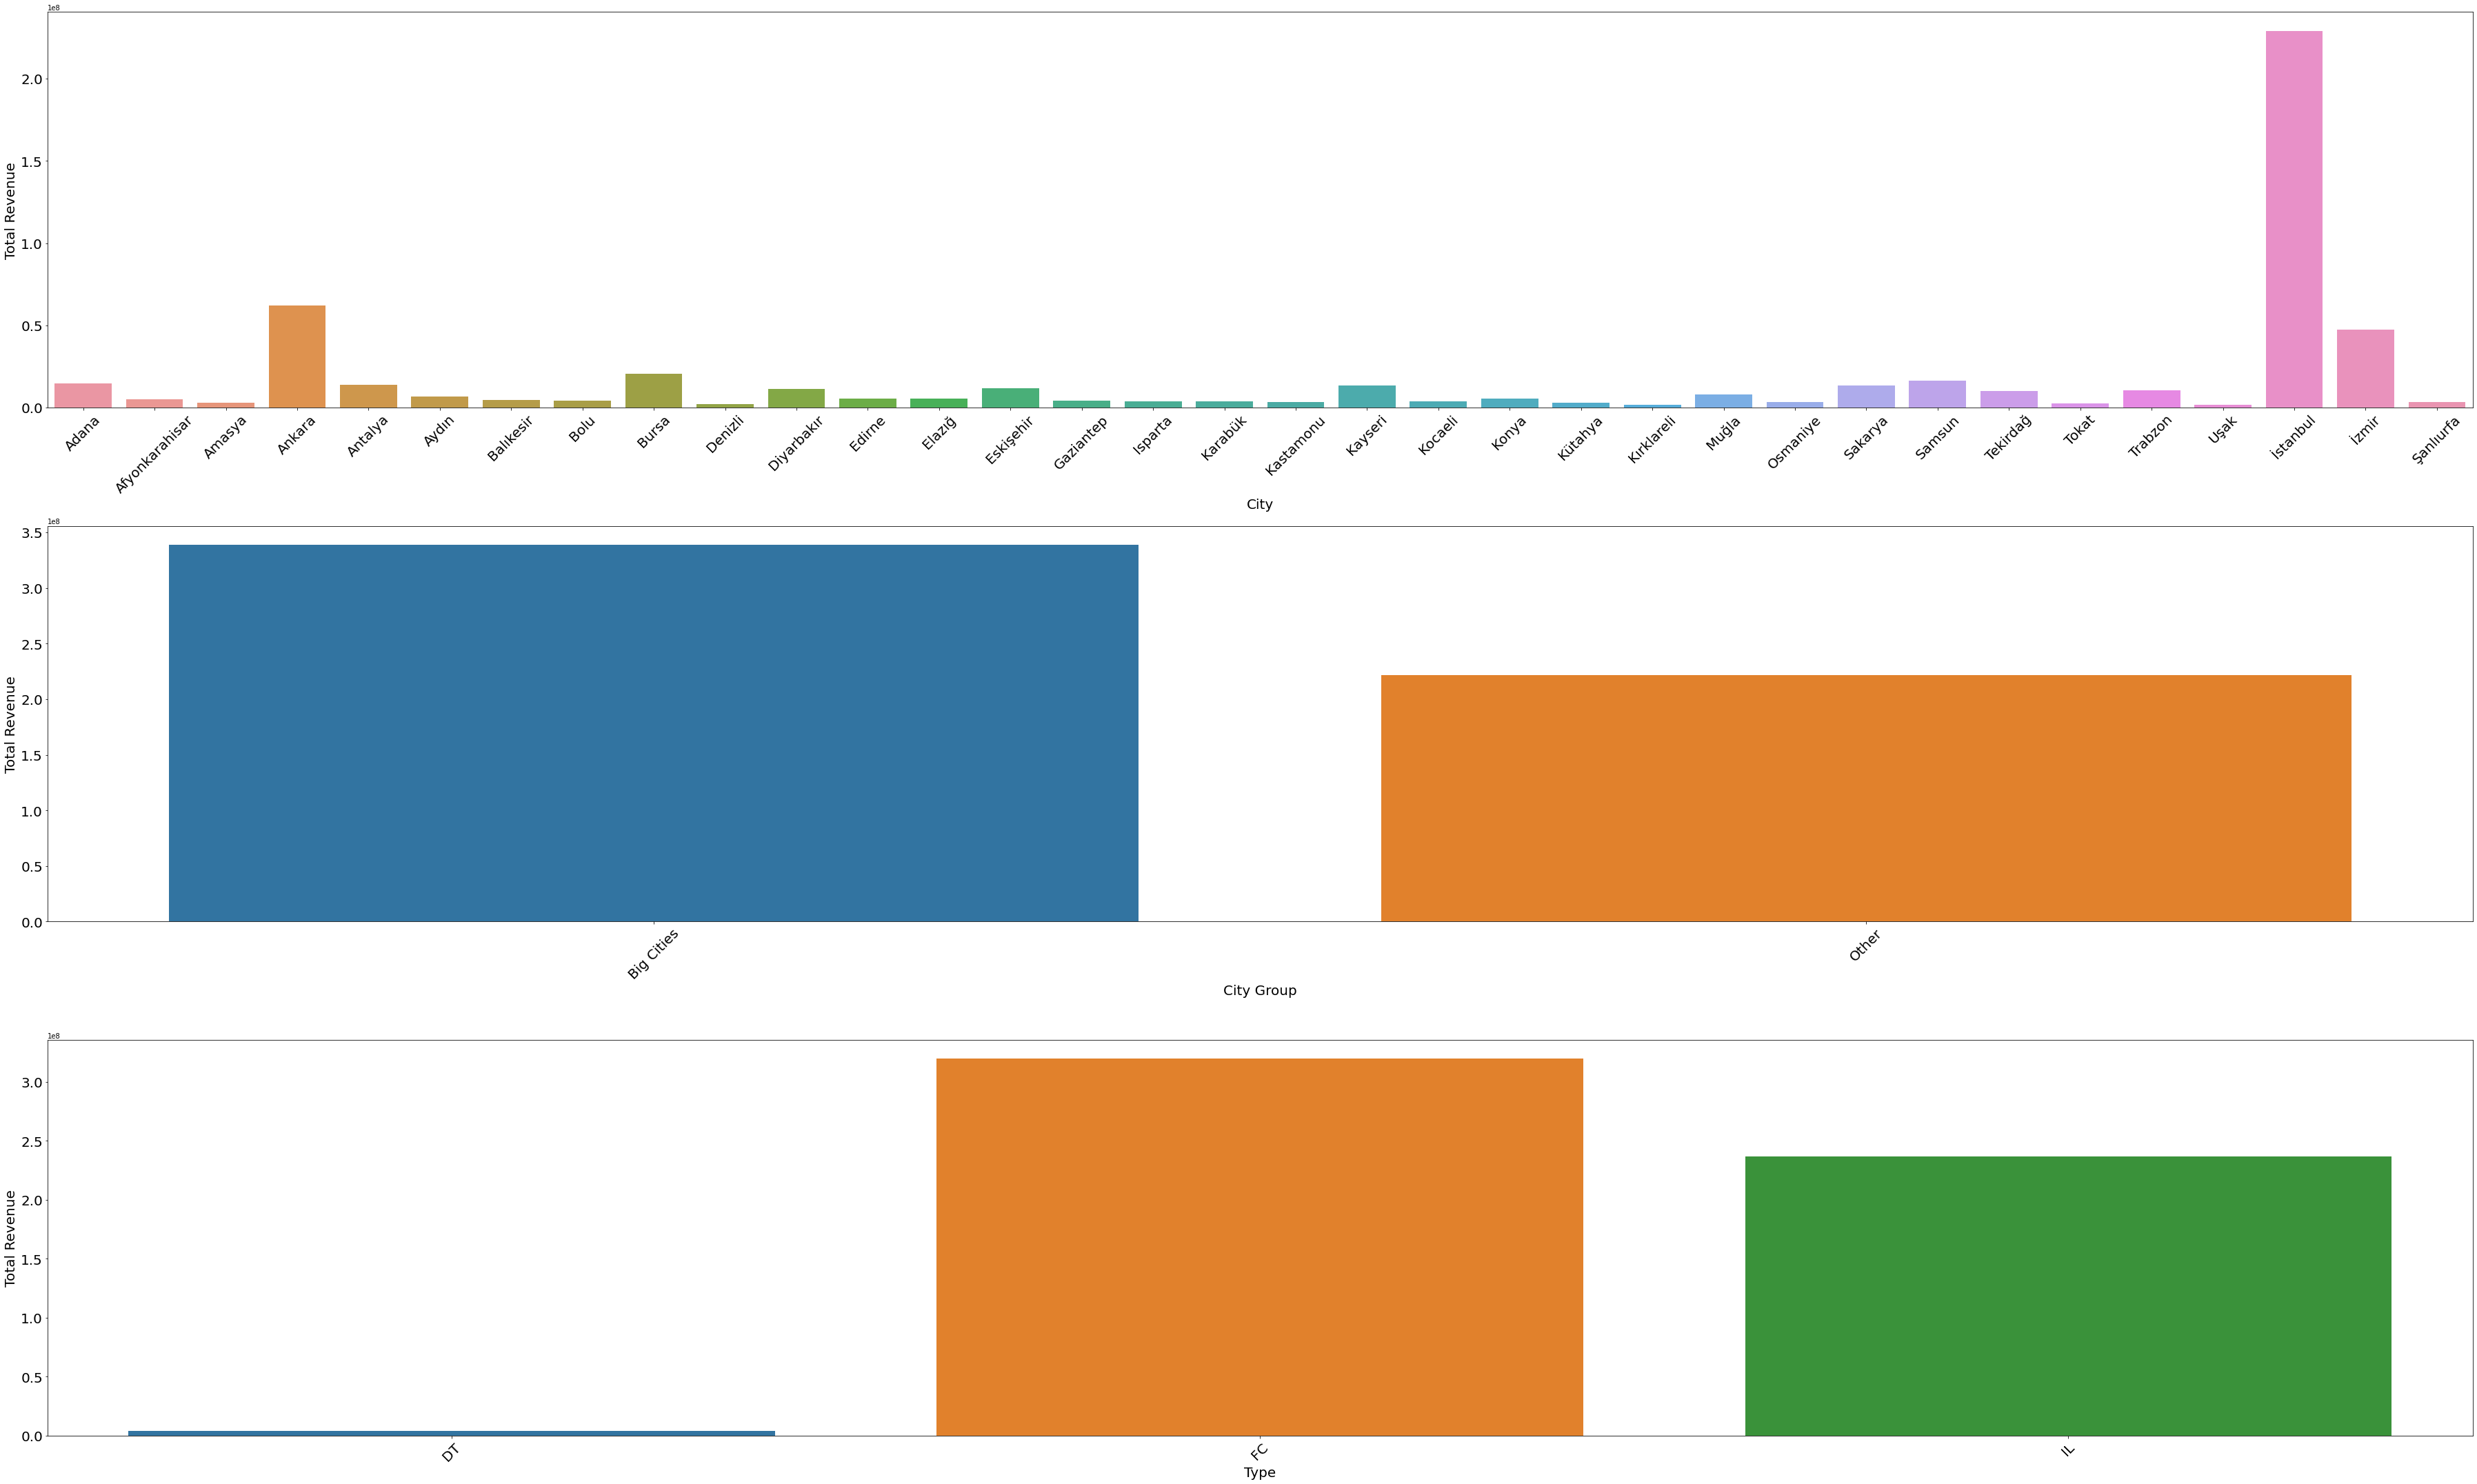

In [14]:
fig, ax = plt.subplots(3, 1, figsize=(50, 30))
for variable, subplot in zip(categorical_features, ax.flatten()):
    df_2 = train[[variable,'revenue']].groupby(variable).revenue.sum().reset_index()
    df_2.columns = [variable,'total_revenue']
    sns.barplot(x=variable, y='total_revenue', data=df_2 , ax=subplot)
    subplot.set_xlabel(variable,fontsize=20)
    subplot.set_ylabel('Total Revenue',fontsize=20)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)
        label.set_size(20)
    for label in subplot.get_yticklabels():
        label.set_size(20)
fig.tight_layout()

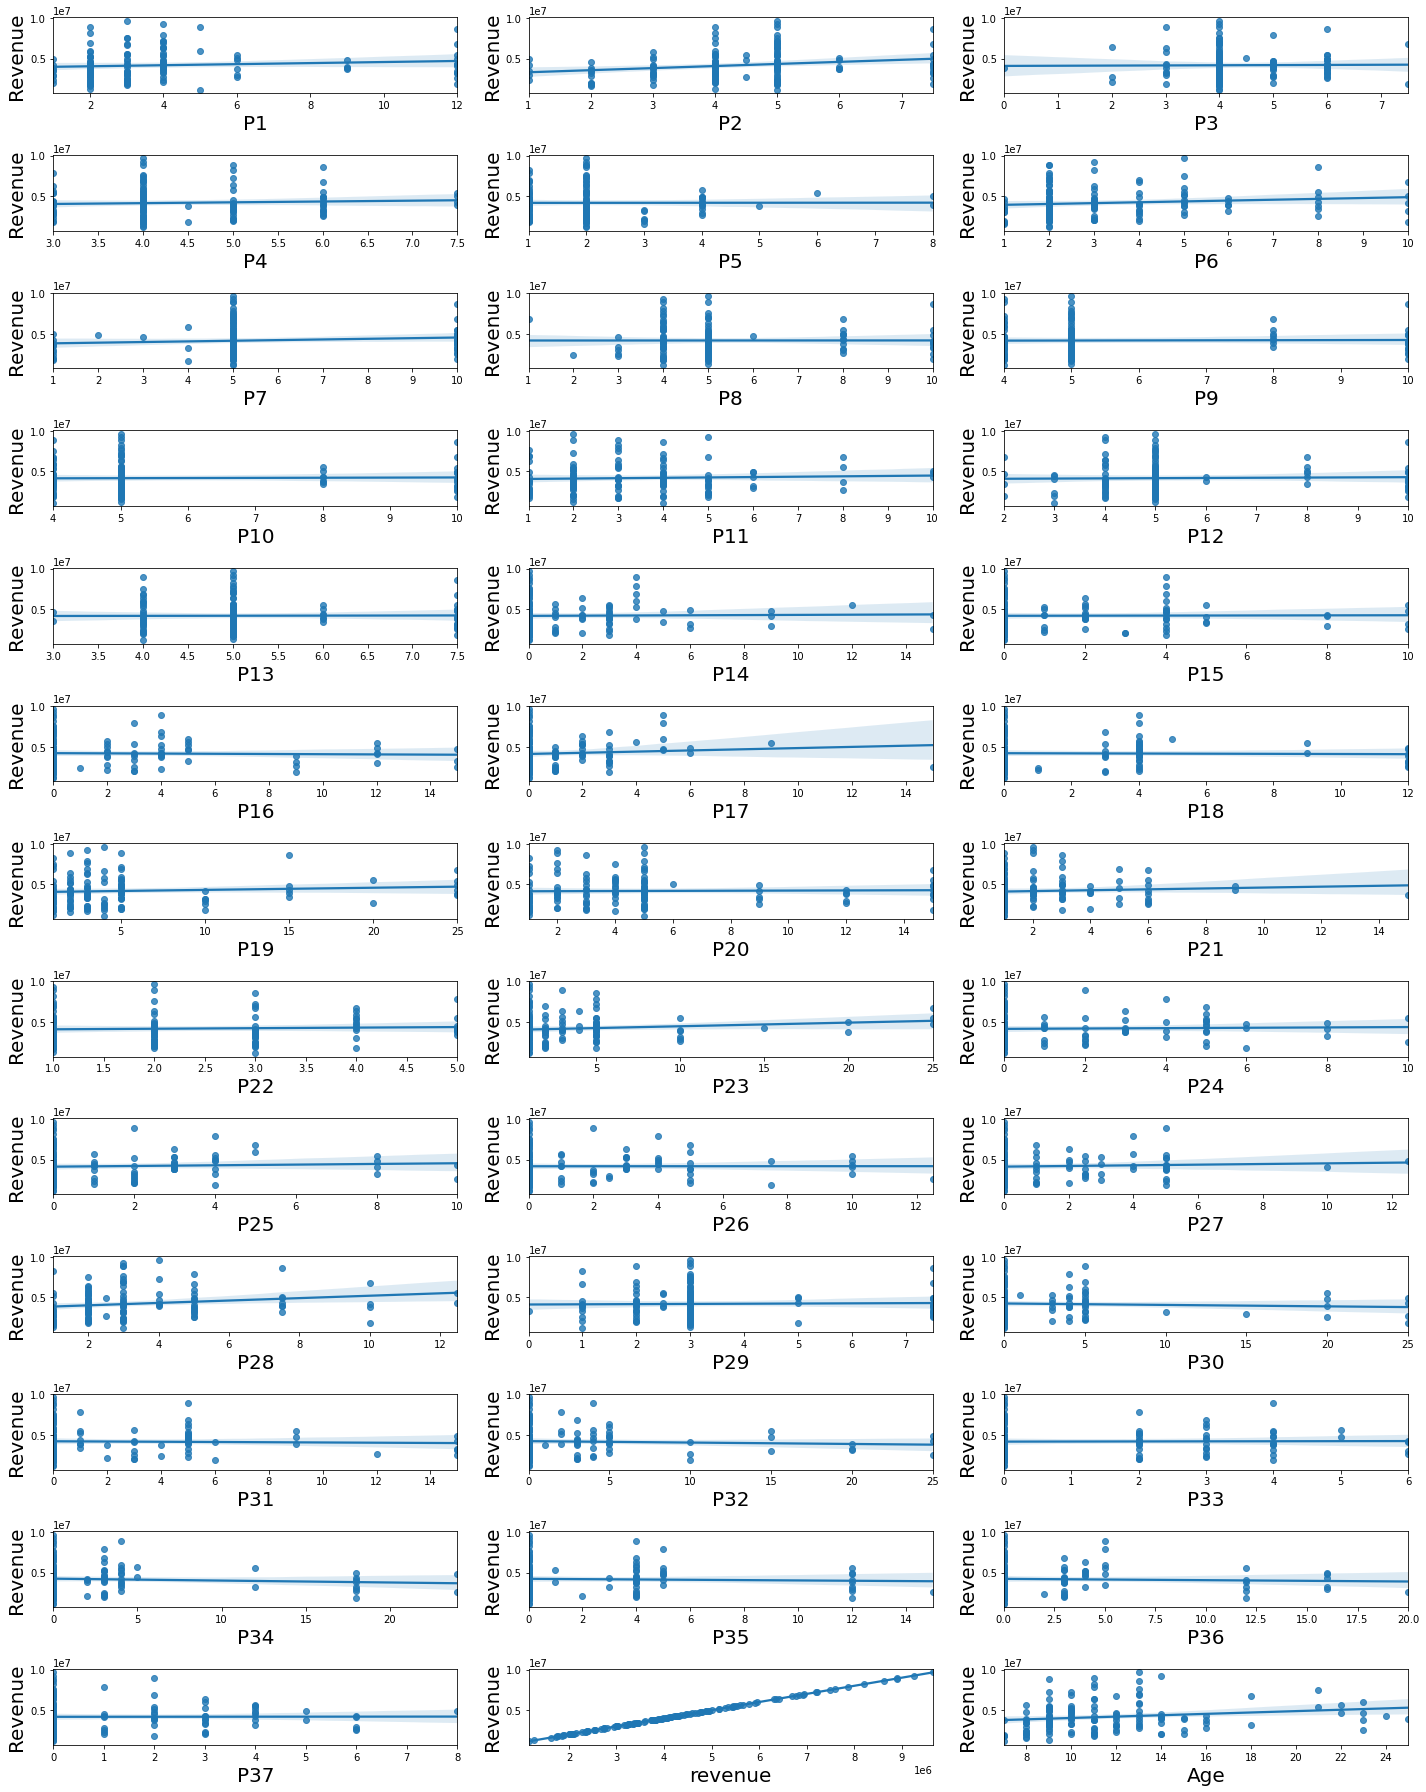

In [17]:
fig, ax = plt.subplots(13, 3, figsize=(20, 25))
for variable, subplot in zip(numerical_features, ax.flatten()):
    sns.regplot(x=train[variable], y=train['revenue'], ax=subplot)
    subplot.set_xlabel(variable,fontsize=20)
    subplot.set_ylabel('Revenue',fontsize=20)
fig.tight_layout()

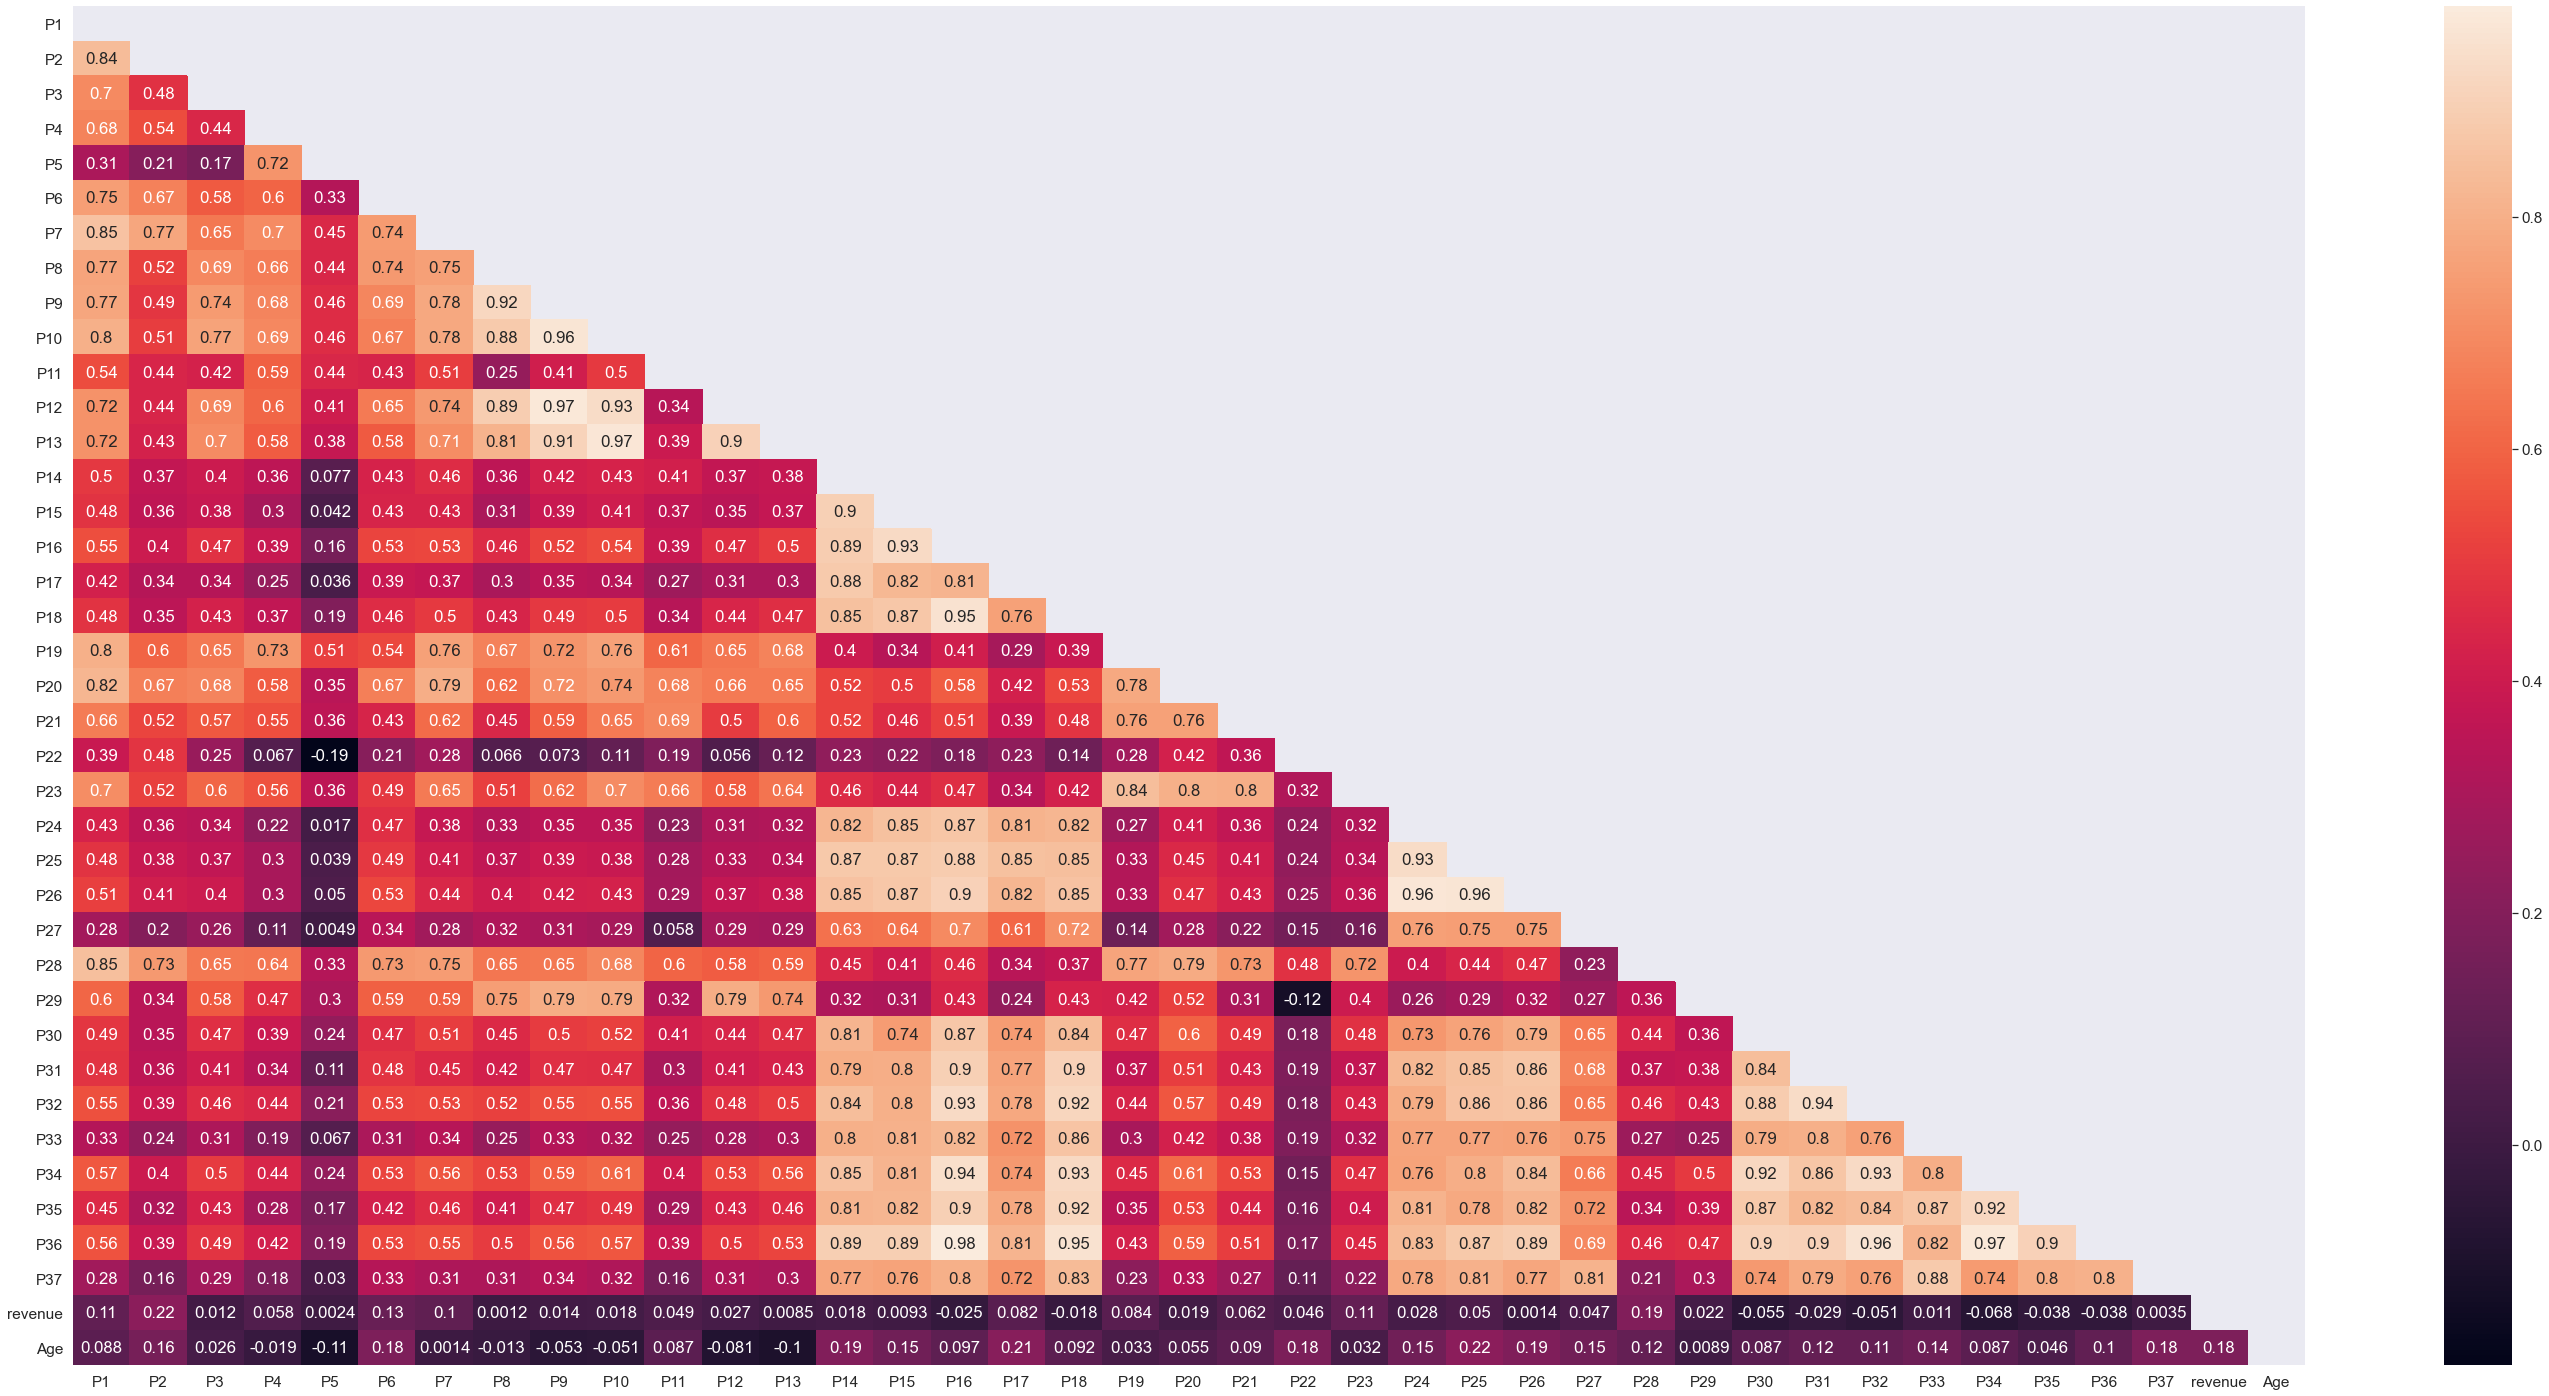

In [19]:
plt.figure(figsize=(50,25))
mask = np.triu(np.ones_like(train.corr(), dtype=np.bool))
sns.heatmap(train.corr(),annot=True, mask=mask)
sns.set(font_scale=1.4)

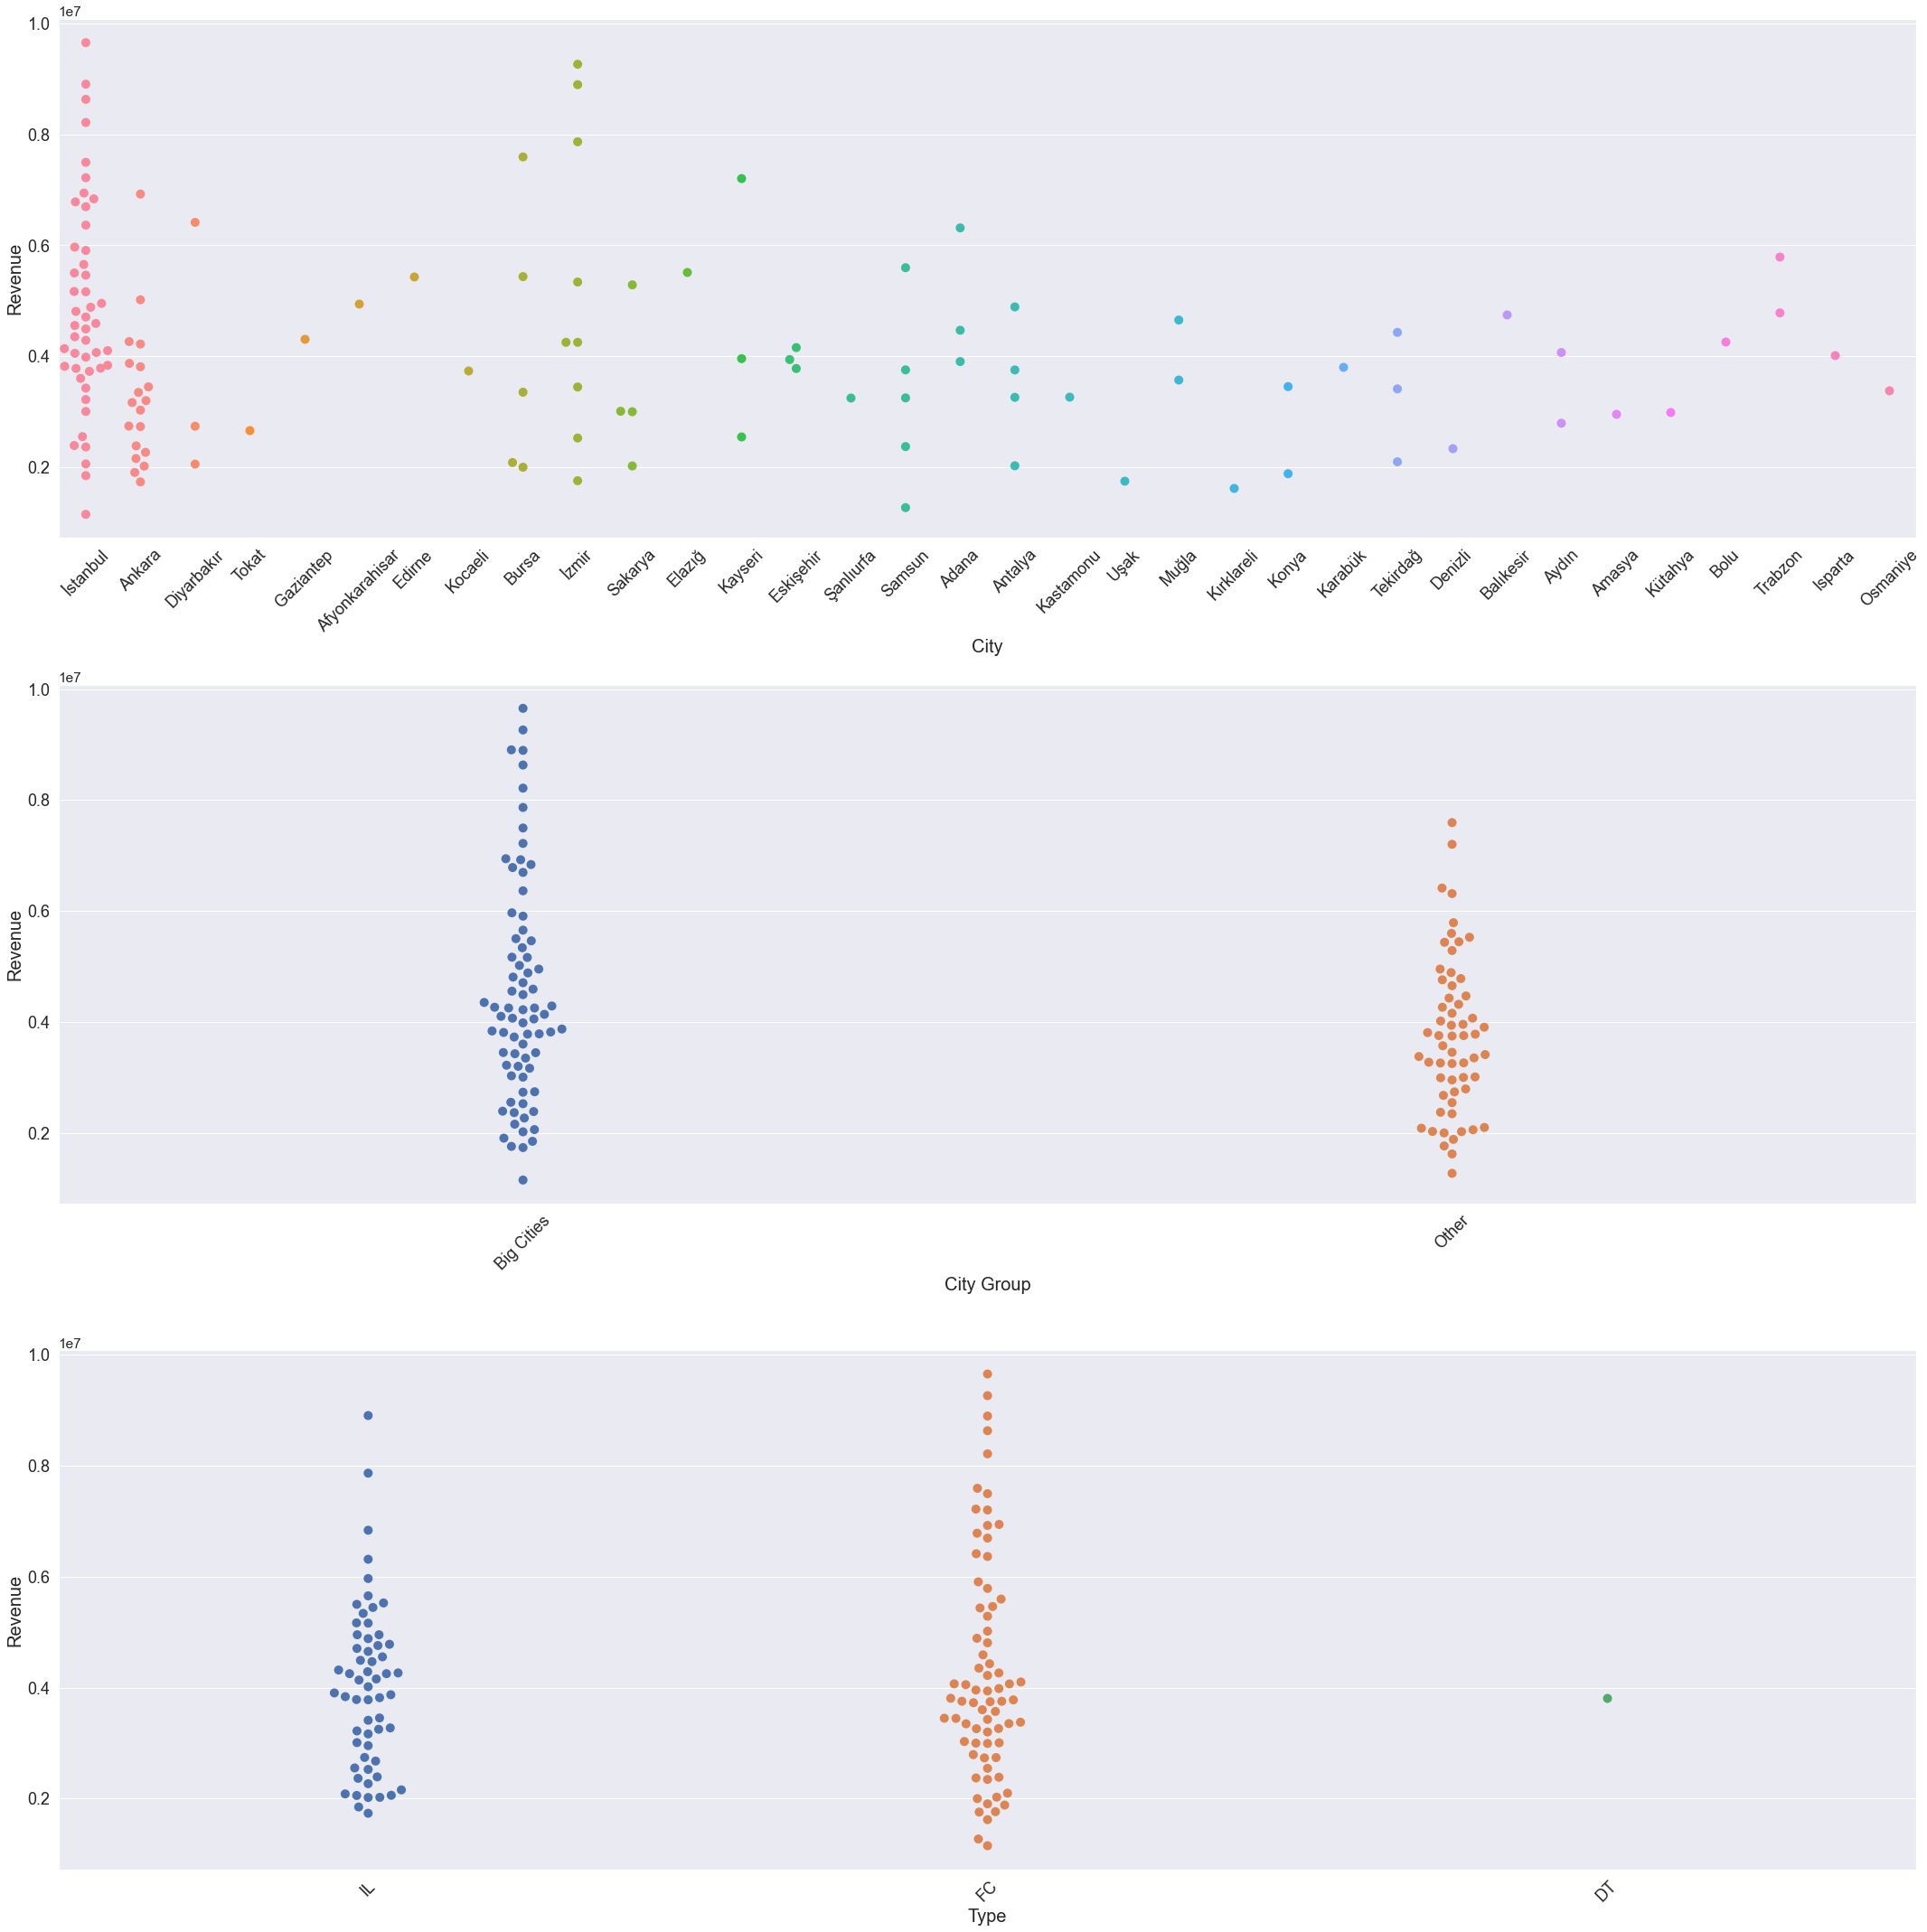

In [21]:
fig, ax = plt.subplots(3, 1, figsize=(30, 30))
for variable, subplot in zip(categorical_features, ax.flatten()):
    sns.swarmplot(x=variable, y='revenue', data=train, ax=subplot,size=10)
    subplot.set_xlabel(variable,fontsize=20)
    subplot.set_ylabel('Revenue',fontsize=20)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)
        label.set_size(18)
    for label in subplot.get_yticklabels():
        label.set_size(18)
fig.tight_layout()

In [22]:
#Taking a look at city group field 
print("--- Train set ---")
print(train['City Group'].value_counts())
print("---- Test set ----")
print(test['City Group'].value_counts())

--- Train set ---
Big Cities    75
Other         59
Name: City Group, dtype: int64
---- Test set ----
Other         50728
Big Cities    49272
Name: City Group, dtype: int64


In [23]:
#Taking a look at type field 
print("--- Train set ---")
print(train['Type'].value_counts())
print("---- Test set ----")
print(test['Type'].value_counts())

--- Train set ---
FC    74
IL    59
DT     1
Name: Type, dtype: int64
---- Test set ----
FC    57019
IL    40447
DT     2244
MB      290
Name: Type, dtype: int64


In [24]:
y = train['revenue']
train=train.drop('revenue', axis=1)

In [25]:
print("Shapes: Train set ", train.shape ,", Test ",test.shape)
df_full = pd.concat([train,test])
print("Full dataset shapes: ", df_full.shape)

Shapes: Train set  (134, 41) , Test  (100000, 41)
Full dataset shapes:  (100134, 41)


In [26]:
print('There are {} cities which restaurant location have been collected.'.format(len(df_full['City'].unique())))

There are 63 cities which restaurant location have been collected.


In [27]:
df_full = df_full.drop('City', axis=1)
df_full.shape

(100134, 40)

In [28]:
p_name = ['P'+str(i) for i in range(1,38)]

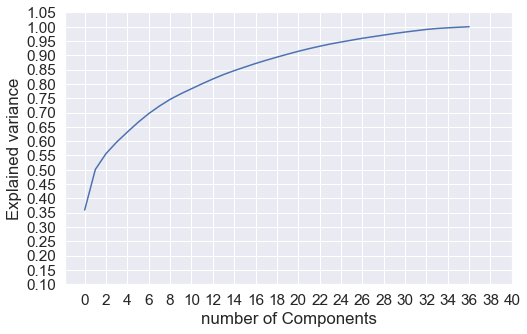

In [30]:
from sklearn.decomposition import PCA
pca = PCA().fit(df_full[p_name])
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of Components')
plt.ylabel('Explained variance')
plt.yticks(np.arange(0.1,1.1,0.05))
plt.xticks(np.arange(0,41,2))
plt.grid(True)

In [31]:
pca_list = ['pca'+str(i) for i in range(1,30,1)]
df_full[pca_list] = PCA(n_components=29).fit_transform(df_full[p_name])
df_full.drop(p_name,axis=1,inplace=True)

In [32]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100134 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City Group  100134 non-null  object 
 1   Type        100134 non-null  object 
 2   Age         100134 non-null  int64  
 3   pca1        100134 non-null  float64
 4   pca2        100134 non-null  float64
 5   pca3        100134 non-null  float64
 6   pca4        100134 non-null  float64
 7   pca5        100134 non-null  float64
 8   pca6        100134 non-null  float64
 9   pca7        100134 non-null  float64
 10  pca8        100134 non-null  float64
 11  pca9        100134 non-null  float64
 12  pca10       100134 non-null  float64
 13  pca11       100134 non-null  float64
 14  pca12       100134 non-null  float64
 15  pca13       100134 non-null  float64
 16  pca14       100134 non-null  float64
 17  pca15       100134 non-null  float64
 18  pca16       100134 non-null  float64
 19  pca

In [33]:
df=pd.get_dummies(df_full, dtype=float)

In [35]:
# Getting number of train sets
numTrain=train.shape[0]

train = df[:numTrain]
test = df[numTrain:]

[Text(0.5, 0, 'revenue'), Text(0, 0.5, 'P(revenue)')]

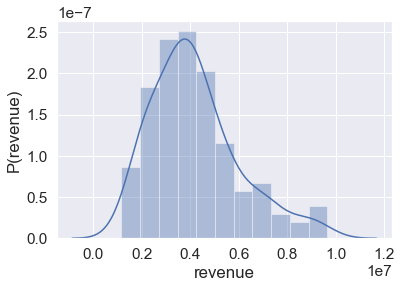

In [36]:
sns.distplot(a=y, kde=True).set(xlabel='revenue', ylabel='P(revenue)')

In [37]:
print("Kurtosis: {}".format(y.kurt()))
print("Skewness: {}".format(y.skew()))

Kurtosis: 0.6027289685209611
Skewness: 0.8952934755058413


In [38]:
from sklearn.model_selection import train_test_split

# Split the data into train and test set
X_train, X_test, y_train, y_test =  train_test_split(train,y,test_size=0.3,random_state=42)
print("Shapes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Shapes:  (93, 36) (41, 36) (93,) (41,)


In [39]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

In [40]:
best_estimators=[]

In [41]:
# parameters
params = {
    "learning_rate": [.1, .5, .7, .9, .95, .99, 1],
    "colsample_bytree": [.3, .4, .5, .6],
    "max_depth": [2, 4],
    "alpha": [1, 3, 5],
    "subsample": [.5],
    "n_estimators": [30, 70, 100, 200],
    "random_state" : [42]
}

## XGBoost Regressor
XGBR =  XGBRegressor()
XGBR_grid = GridSearchCV(XGBR, params, scoring='r2', cv=5, n_jobs=-1)
XGBR_grid.fit(X_train, y_train)

## Output
print("Best parameters:  {}:".format(XGBR_grid.best_params_))
print("Best score: {}".format(XGBR_grid.best_score_))

## Append to list
best_estimators.append(["XGBoostR",XGBR_grid.best_estimator_])

Best parameters:  {'alpha': 5, 'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'random_state': 42, 'subsample': 0.5}:
Best score: 0.09244740184012072


In [42]:
## parameters
params = {
    "n_estimators": [10, 30, 50, 100],
    "learning_rate": [.01, 0.1, 0.5, 0.9, 0.95, 1],
    "random_state" : [42]
}

## XGBoost Regressor
AdaBoostR =   AdaBoostRegressor()
AdaBoostR_grid = GridSearchCV(AdaBoostR, params, scoring='r2', cv=5, n_jobs=-1)
AdaBoostR_grid.fit(X_train, y_train)

## Output
print("Best parameters:  {}:".format(AdaBoostR_grid.best_params_))
print("Best score: {}".format(AdaBoostR_grid.best_score_))

## Append to list
best_estimators.append(["AdaBoostR",AdaBoostR_grid.best_estimator_])

Best parameters:  {'learning_rate': 0.01, 'n_estimators': 100, 'random_state': 42}:
Best score: 0.07962272753560236


In [43]:
from sklearn.neighbors import KNeighborsRegressor

params_knn = {
    'n_neighbors' : [3, 5, 7, 9, 11],
}

knn_model = KNeighborsRegressor()
knn_regressor = GridSearchCV(knn_model, params_knn, scoring='neg_root_mean_squared_error', cv=10, n_jobs=-1)
knn_regressor.fit(X_train, y_train)
print(f'Optimal neighbors: {knn_regressor.best_params_["n_neighbors"]}')
print(f'Best score: {knn_regressor.best_score_}')

Optimal neighbors: 7
Best score: -1668237.6263026267


In [44]:
from sklearn.ensemble import RandomForestRegressor

params_rf = {
    'max_depth': [10, 30, 35, 50, 65, 75, 100],
    'max_features': [.3, .4, .5, .6],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [30, 50, 100, 200]
}

rf = RandomForestRegressor()
rf_regressor = GridSearchCV(rf, params_rf, scoring='neg_root_mean_squared_error', cv = 10, n_jobs = -1)
rf_regressor.fit(X_train, y_train)
print(f'Optimal depth: {rf_regressor.best_params_["max_depth"]}')
print(f'Optimal max_features: {rf_regressor.best_params_["max_features"]}')
print(f'Optimal min_sample_leaf: {rf_regressor.best_params_["min_samples_leaf"]}')
print(f'Optimal min_samples_split: {rf_regressor.best_params_["min_samples_split"]}')
print(f'Optimal n_estimators: {rf_regressor.best_params_["n_estimators"]}')
print(f'Best score: {rf_regressor.best_score_}')

Optimal depth: 10
Optimal max_features: 0.6
Optimal min_sample_leaf: 5
Optimal min_samples_split: 8
Optimal n_estimators: 30
Best score: -1568661.9685746967


In [45]:
import lightgbm as lgbm

params_lgbm = {
    'learning_rate': [.01, .1, .5, .7, .9, .95, .99, 1],
    'boosting': ['gbdt'],
    'metric': ['l1'],
    'feature_fraction': [.3, .4, .5, 1],
    'num_leaves': [20],
    'min_data': [10],
    'max_depth': [10],
    'n_estimators': [10, 30, 50, 100]
}

lgb = lgbm.LGBMRegressor()
lgb_regressor = GridSearchCV(lgb, params_lgbm, scoring='neg_root_mean_squared_error', cv = 10, n_jobs = -1)
lgb_regressor.fit(X_train, y_train)
print(f'Optimal lr: {lgb_regressor.best_params_["learning_rate"]}')
print(f'Optimal feature_fraction: {lgb_regressor.best_params_["feature_fraction"]}')
print(f'Optimal n_estimators: {lgb_regressor.best_params_["n_estimators"]}')
print(f'Best score: {lgb_regressor.best_score_}')

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
Optimal lr: 0.1
Optimal feature_fraction: 0.3
Optimal n_estimators: 10
Best score: -1659176.406754729
